# Applying KNN in K Means Clustering

### Algorithm:

1. Input 'n' as number of centroids and 'k' as the number of nearest neighbours to check from.
2. Select 'n' centroids randomly.
3. Calculate distance of each element from all centroids and assign to closest centroid.
4. Get KNN of the centroid from the new-formed clusters.
5. Generate new centroid by finding the mean of the KNN.
6. If new centroids are same as old centroids, go to step 8.
7. Else, go to step 3.

In [1]:
import random
from copy import deepcopy

import matplotlib.pyplot as plt

In [2]:
def getDistance(centroid, element):
    
    distance = 0
    for i in range(len(centroid)):
        # Manhattan Distance
        distance += abs(centroid[i]-element[i])
    return distance

def getClosest(centroids, element):
    
    closest = 0
    shortest = getDistance(centroids[closest], element)
    for centroid in range(len(centroids)):
        distance = getDistance(centroids[centroid], element)
        if distance < shortest:
            shortest = distance
            closest = centroid
    return closest

def getKNearest(clus, centroid, k):
    
    knn = []
    cluster = deepcopy(clus)
    
    while len(knn) < k and len(cluster) > 0:
        
        closest = 0
        shortest = getDistance(centroid, cluster[closest])
        
        for i in range(len(cluster)):
            dist = getDistance(centroid, cluster[i])
            if dist <= shortest and i != closest:
                closest = i
                shortest = dist
                
        knn.append(cluster[closest])
        del cluster[closest]
    
    return knn

def KNNClustering(n, k, data):
    
    # Select n centroids randomly
    curCentroids = []
    newCentroids = []
    clusters = []
    clustervalue = []
    datasize = len(data)
    while len(curCentroids) < n:
        cent = random.randint(0, datasize-1)
        if data[cent] not in curCentroids:
            curCentroids.append(data[cent])
            clusters.append([])
            newCentroids.append([])
            
    while newCentroids != curCentroids:
        
        if newCentroids != curCentroids and len(newCentroids[0]) > 0:
            curCentroids = deepcopy(newCentroids)
            
        for i in range(len(clusters)):
            clusters[i] = []
            newCentroids[i] = []
        
        # Calculate distance of each element and assign to the closest centroid
        for i in range(datasize):
            closest = getClosest(curCentroids, data[i])
            clusters[closest].append(data[i])
            if len(clustervalue) == i:
                clustervalue.append(closest)
            else:
                clustervalue[i] = closest
            
        knnclusters = []
        for i in range(len(clusters)):
            knnclusters.append(getKNearest(clusters[i], curCentroids[i], k))
        
        # Calculate the new centriods
        for cluster in range(len(knnclusters)):
            for element in range(len(knnclusters[cluster])):
                for attribute in range(len(knnclusters[cluster][element])):
                    if len(newCentroids[cluster]) == attribute:
                        newCentroids[cluster].append(0)
                    
                    # Calculating mean
                    newCentroids[cluster][attribute] *= element
                    newCentroids[cluster][attribute] += knnclusters[cluster][element][attribute]
                    newCentroids[cluster][attribute] /= element+1
                    
    return [clustervalue, newCentroids]

def KMeansClustering(n, data):
    
    # Select n centroids randomly
    curCentroids = []
    newCentroids = []
    clusters = []
    clustervalue = []
    datasize = len(data)
    while len(curCentroids) < n:
        cent = random.randint(0, datasize-1)
        if data[cent] not in curCentroids:
            curCentroids.append(data[cent])
            clusters.append([])
            newCentroids.append([])
            
    while newCentroids != curCentroids:
        
        if newCentroids != curCentroids and len(newCentroids[0]) > 0:
            curCentroids = deepcopy(newCentroids)
            
        for i in range(len(clusters)):
            clusters[i] = []
            newCentroids[i] = []
        
        # Calculate distance of each element and assign to the closest centroid
        for i in range(datasize):
            closest = getClosest(curCentroids, data[i])
            clusters[closest].append(data[i])
            if len(clustervalue) == i:
                clustervalue.append(closest)
            else:
                clustervalue[i] = closest
        
        # Calculate the new centriods
        for cluster in range(len(clusters)):
            for element in range(len(clusters[cluster])):
                for attribute in range(len(clusters[cluster][element])):
                    if len(newCentroids[cluster]) == attribute:
                        newCentroids[cluster].append(0)
                    
                    # Calculating mean
                    newCentroids[cluster][attribute] *= element
                    newCentroids[cluster][attribute] += clusters[cluster][element][attribute]
                    newCentroids[cluster][attribute] /= element+1
                    
    return [clustervalue, newCentroids]

In [3]:
data = [
    [0, 2],
    [0, 4],
    [1, 2],
    [3, 1],
    [5, 8],
    [4, 2],
    [2, 5],
    [1, 5],
    [9, 4],
    [8, 3],
    [3, 9],
    [7, 1],
    [5, 8],
    [1, 8],
    [2, 5],
    [3, 6],
    [5, 2],
    [4, 3],
    [8, 5],
    [6, 7],
    [7, 7],
    [9, 1],
    [7, 0],
    [2, 9],
]
n = 3
k = 4
col = ['Red', 'Blue', 'Green']

In [4]:
KNN = KNNClustering(n, k, data)
knnvals = KNN[0]
knnc = KNN[1]

KME = KMeansClustering(n, data)
kmevals = KME[0]
kmec = KME[1]

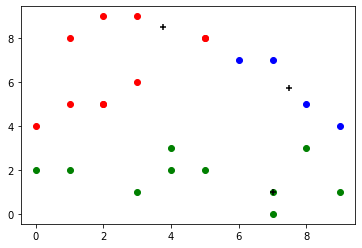

In [5]:
for i in range(len(data)):
    x = data[i][0]
    y = data[i][1]
    plt.scatter(x, y, c=col[knnvals[i]])

for i in range(len(knnc)):
    x = knnc[i][0]
    y = knnc[i][1]
    plt.scatter(x, y, marker='+', c='Black')

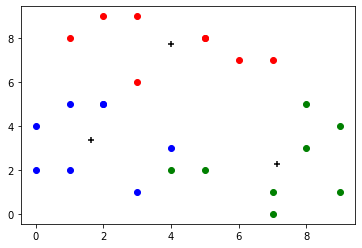

In [6]:
for i in range(len(data)):
    x = data[i][0]
    y = data[i][1]
    plt.scatter(x, y, c=col[kmevals[i]])

for i in range(len(kmec)):
    x = kmec[i][0]
    y = kmec[i][1]
    plt.scatter(x, y, marker='+', c='Black')